In [1]:
# === SETUP === #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import missingno as msno
%matplotlib inline

In [2]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Quantitative Investment Portfolio/Data/'
data = pd.read_parquet(data_dir + 'factors.parquet')

Mounted at /content/drive


In [3]:
data.columns

Index(['permno', 'yyyymm', 'hsiccd', 'ret', 'lnP', 'lnsize',
       'AbnormalAccruals', 'Accruals', 'AssetGrowth', 'Beta', 'betaVIX',
       'BMdec', 'BookLeverage', 'CF', 'ChAssetTurnover', 'ChNAnalyst',
       'CPVolSpread', 'EarningsStreak', 'EP', 'FEPS', 'fgr5yrLag', 'GP',
       'grcapx', 'GrLTNOA', 'High52', 'hire', 'IdioVol3F', 'IntMom',
       'Investment', 'Mom6m', 'MomOffSeason', 'MomSeason', 'NetDebtPrice',
       'OperProfRD', 'OScore', 'RD', 'ReturnSkew3F', 'REV6', 'RIVolSpread',
       'ShareIss1Y', 'SmileSlope', 'SurpriseRD', 'DebtIssuance'],
      dtype='object')

In [4]:
# === SELECT FACTORS === #
factors = data.columns[3:]

In [14]:
# === Final Null Count Analysis === #

null_counts = data[factors].isna().sum()
row_count = data[factors].shape[0]
null_counts = (null_counts / row_count) * 100
null_counts = null_counts.to_numpy().reshape(-1,)

In [6]:
def line(x,y,ax,c='red',l='--'):
    ax.plot([0,x],[y,y],color=c,linestyle=l)
    ax.plot([x,x],[0,y],color=c,linestyle=l)

def liness(n,bins,ax,x=None,y=None):
    c = 'red'
    if(x): y = np.interp(x, bins[1:], n)
    elif(y):
        x = np.interp(y, n, bins[1:])
        c = 'black'
    else: return
    for i in range(len(x)):line(x[i],y[i],ax,c=c)

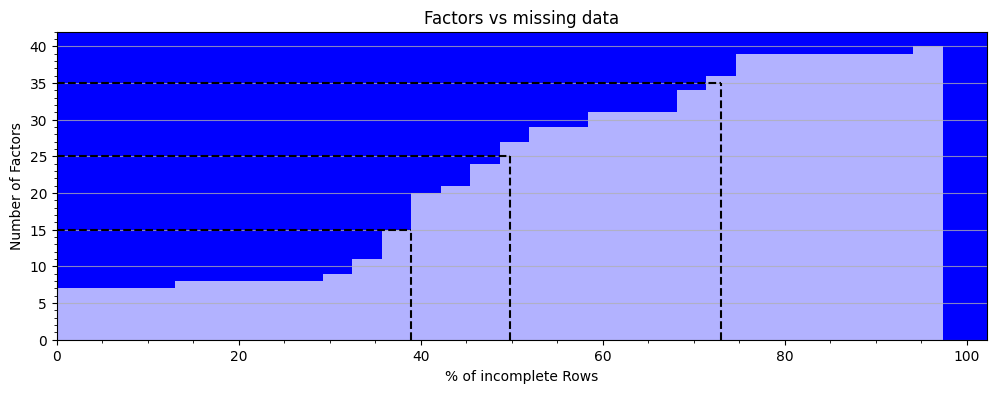

In [19]:
fig,ax = plt.subplots(1,1, figsize=(12, 4))

# Create a cumulative histogram
n, bins, patches = ax.hist(null_counts, bins=30, cumulative=True, color='white', alpha=0.7)
ax.set_facecolor('blue')

# Total frequency
total_freq = n[-1]

vars = [35,25,15]
freq = [20,50,70]

#liness(n,bins,ax,x=freq)
liness(n,bins,ax,y=vars)

# Add labels and title
plt.xlabel('% of incomplete Rows')
plt.ylabel('Number of Factors')
plt.title('Factors vs missing data')
plt.xlim(left=0)  # Set left limit for x-axis (so it starts at 0)
plt.ylim(bottom=0)  # Set bottom limit for y-axis (so it starts at 0)
# Show the plot
plt.minorticks_on()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [20]:
### 7 variables can be used with no missing values!
### If we can bear with 50% missing data get 25 variables.
### 35 variables can be used with 75% missing!

In [21]:
sorted_cols = data[factors]

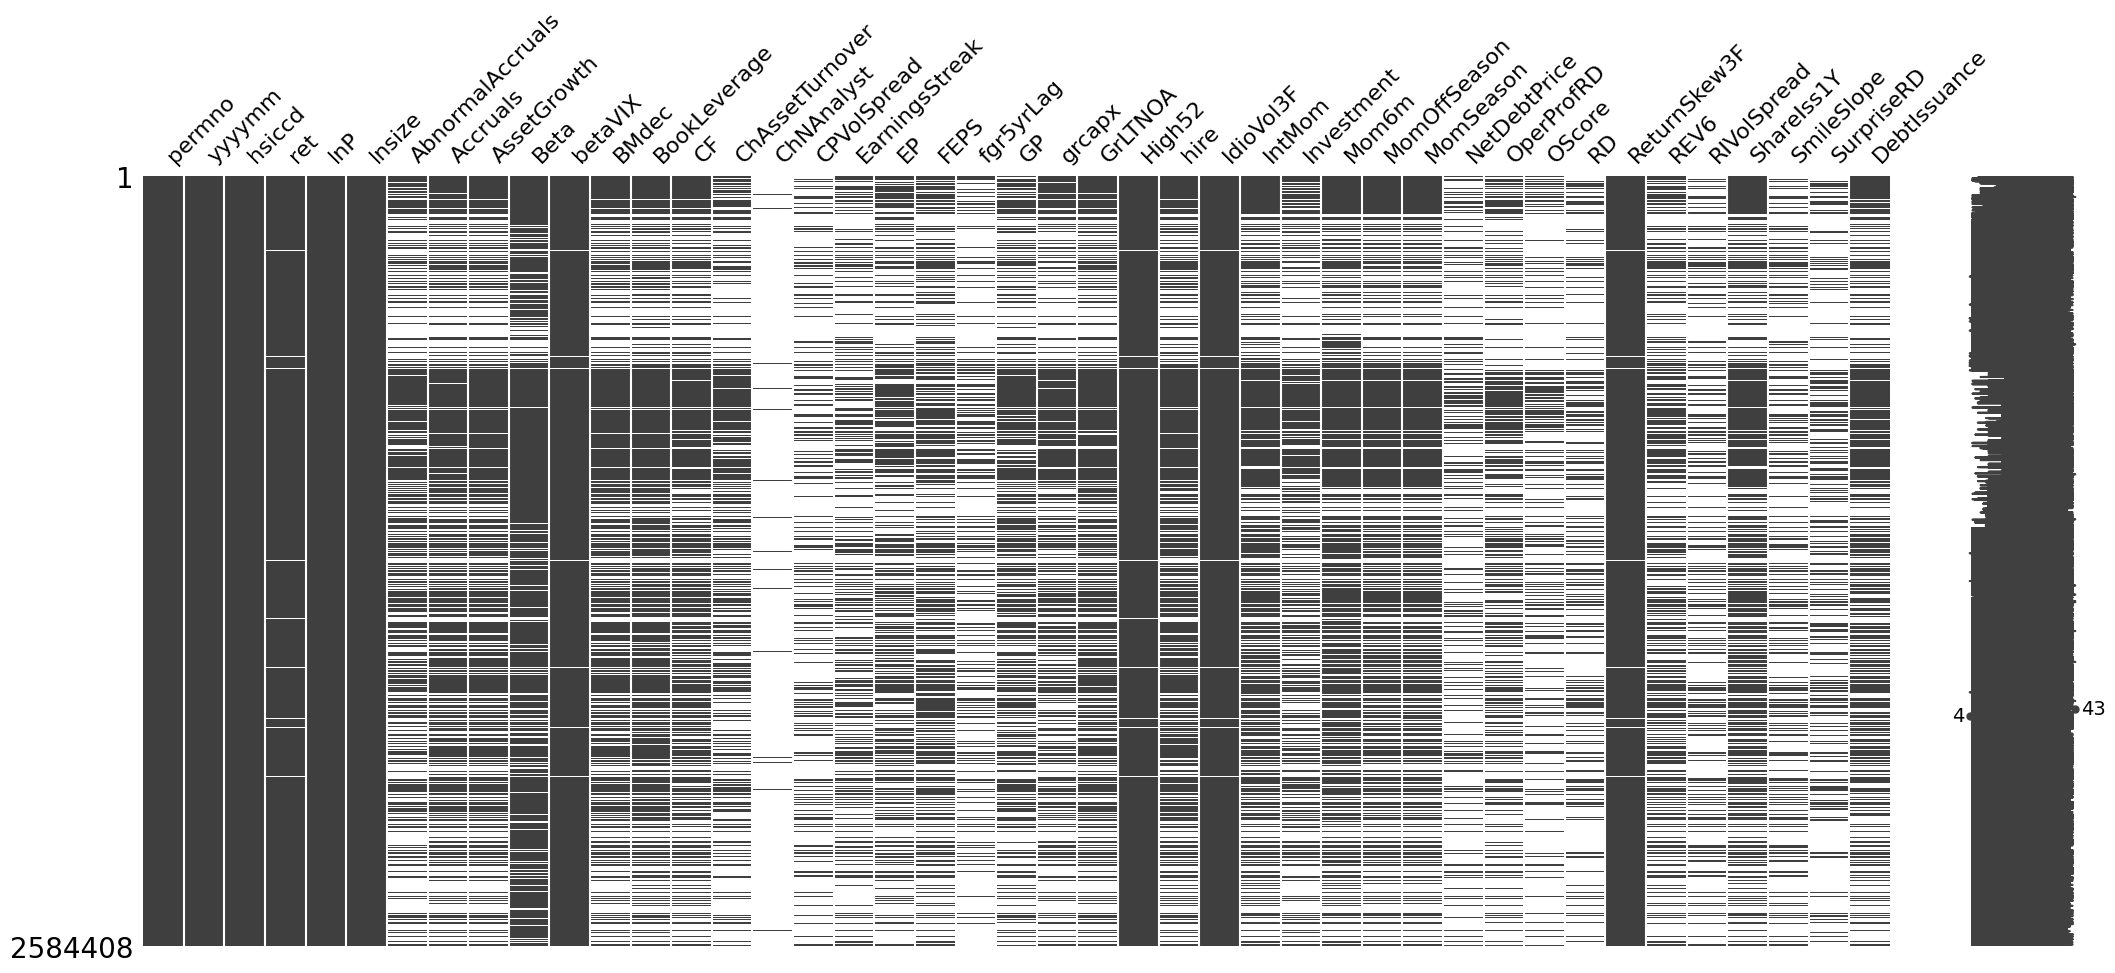

In [33]:
msno.matrix(data)
plt.show()

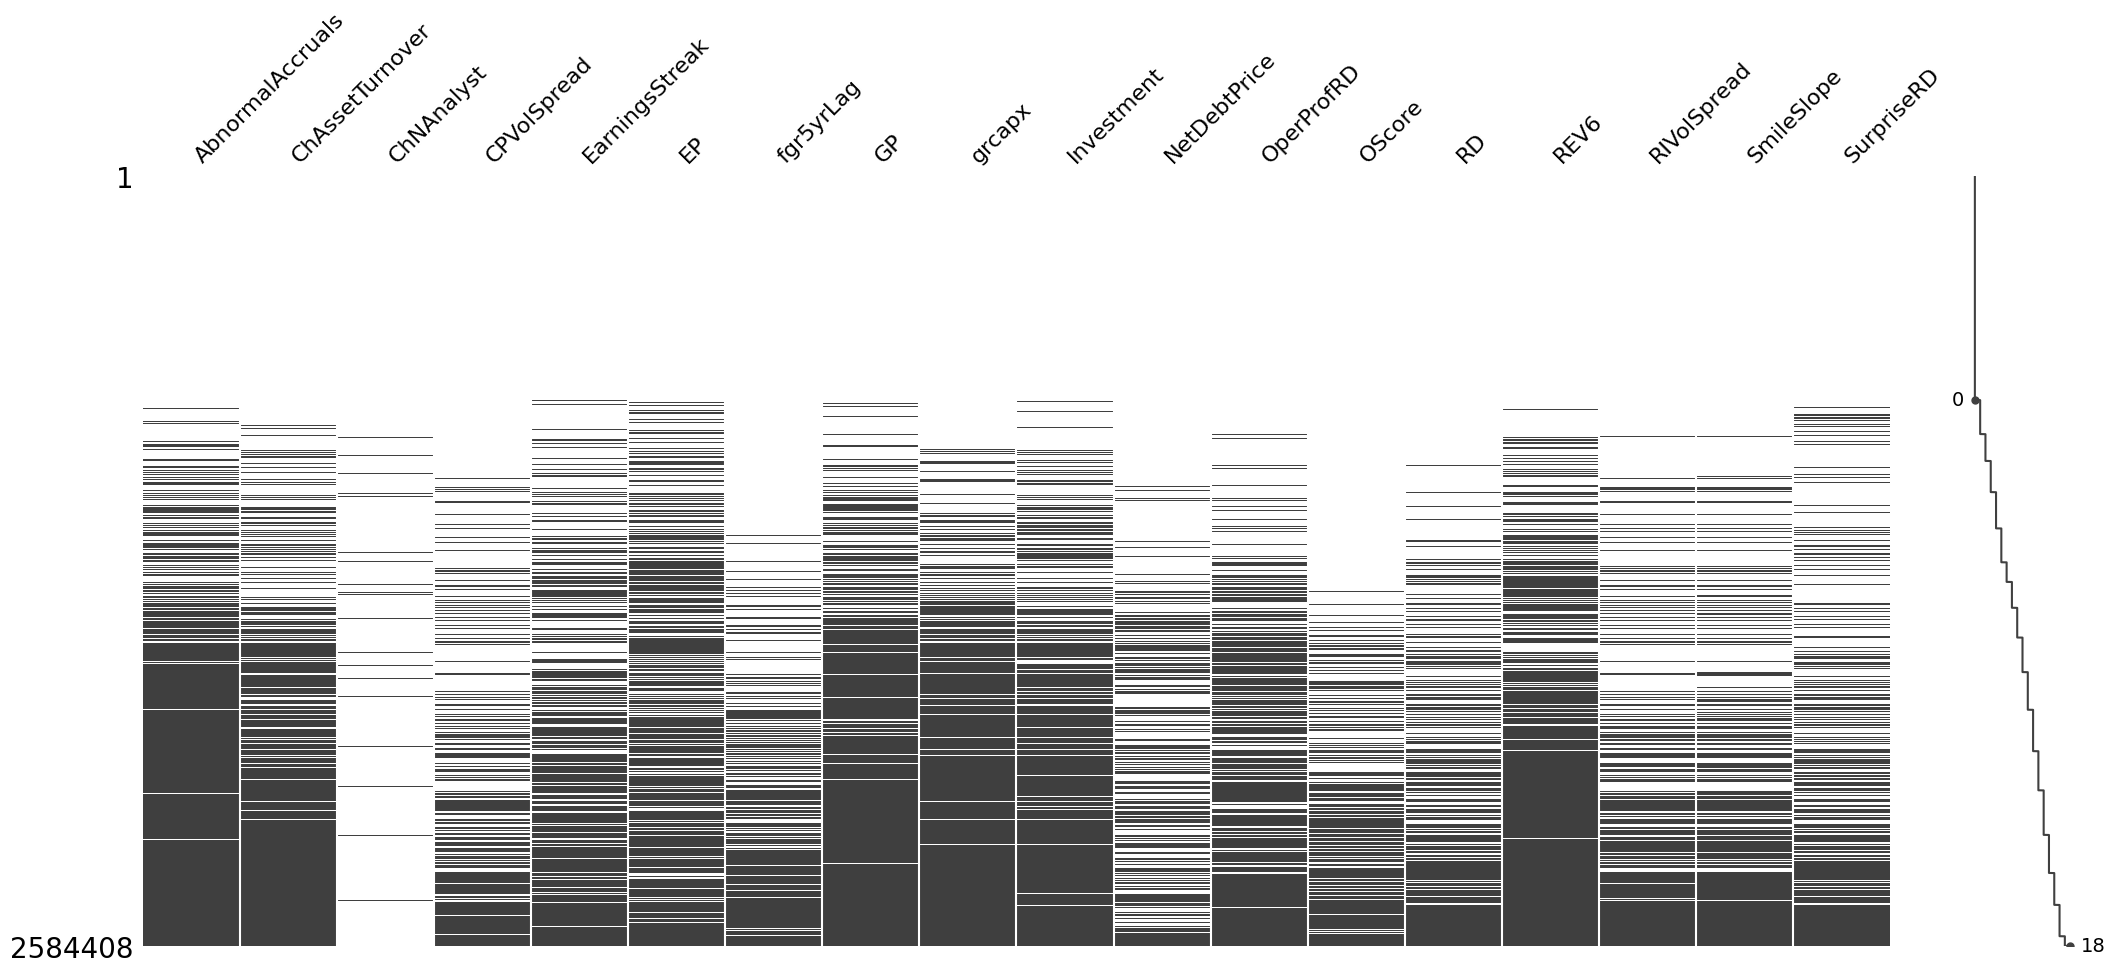

In [27]:
msno.matrix(sorted_cols, filter='bottom', n=18, sort='ascending')
plt.show()

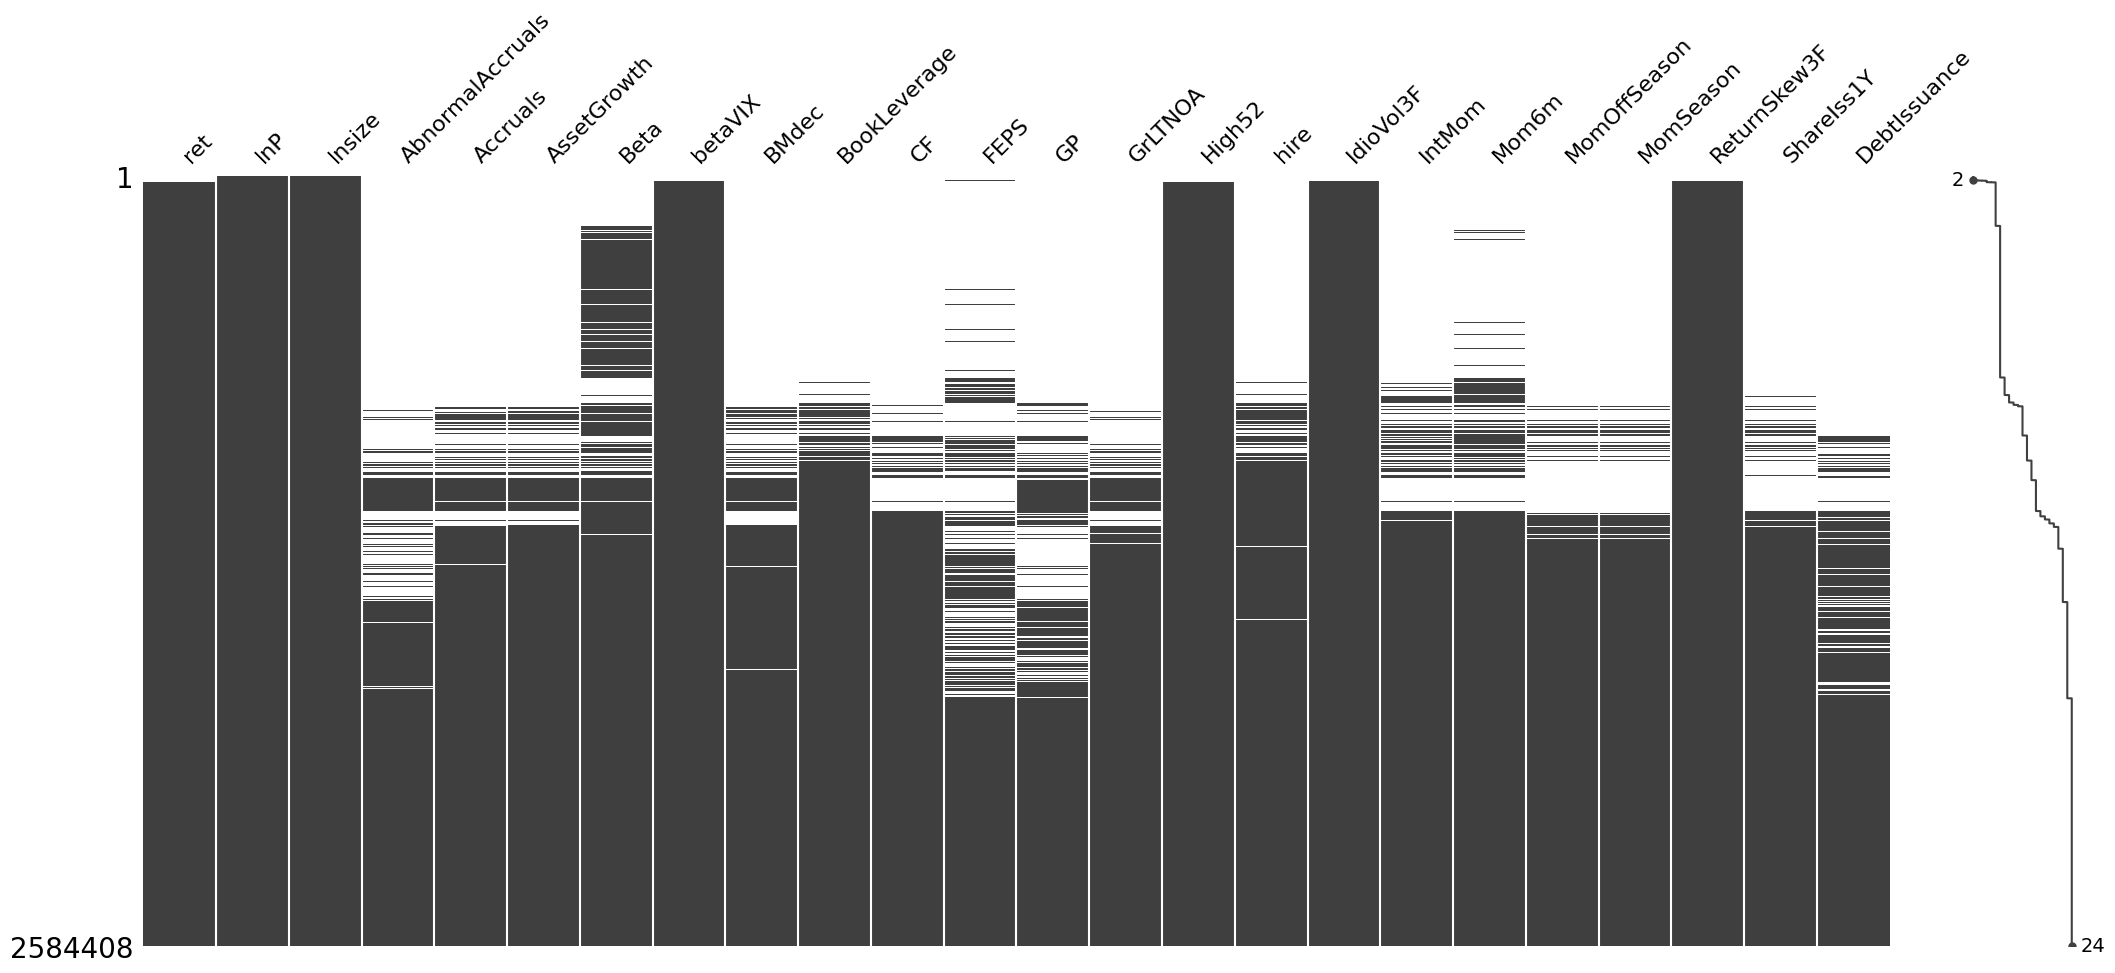

In [32]:
msno.matrix(sorted_cols, filter='top', n=24, sort='ascending')
plt.show()

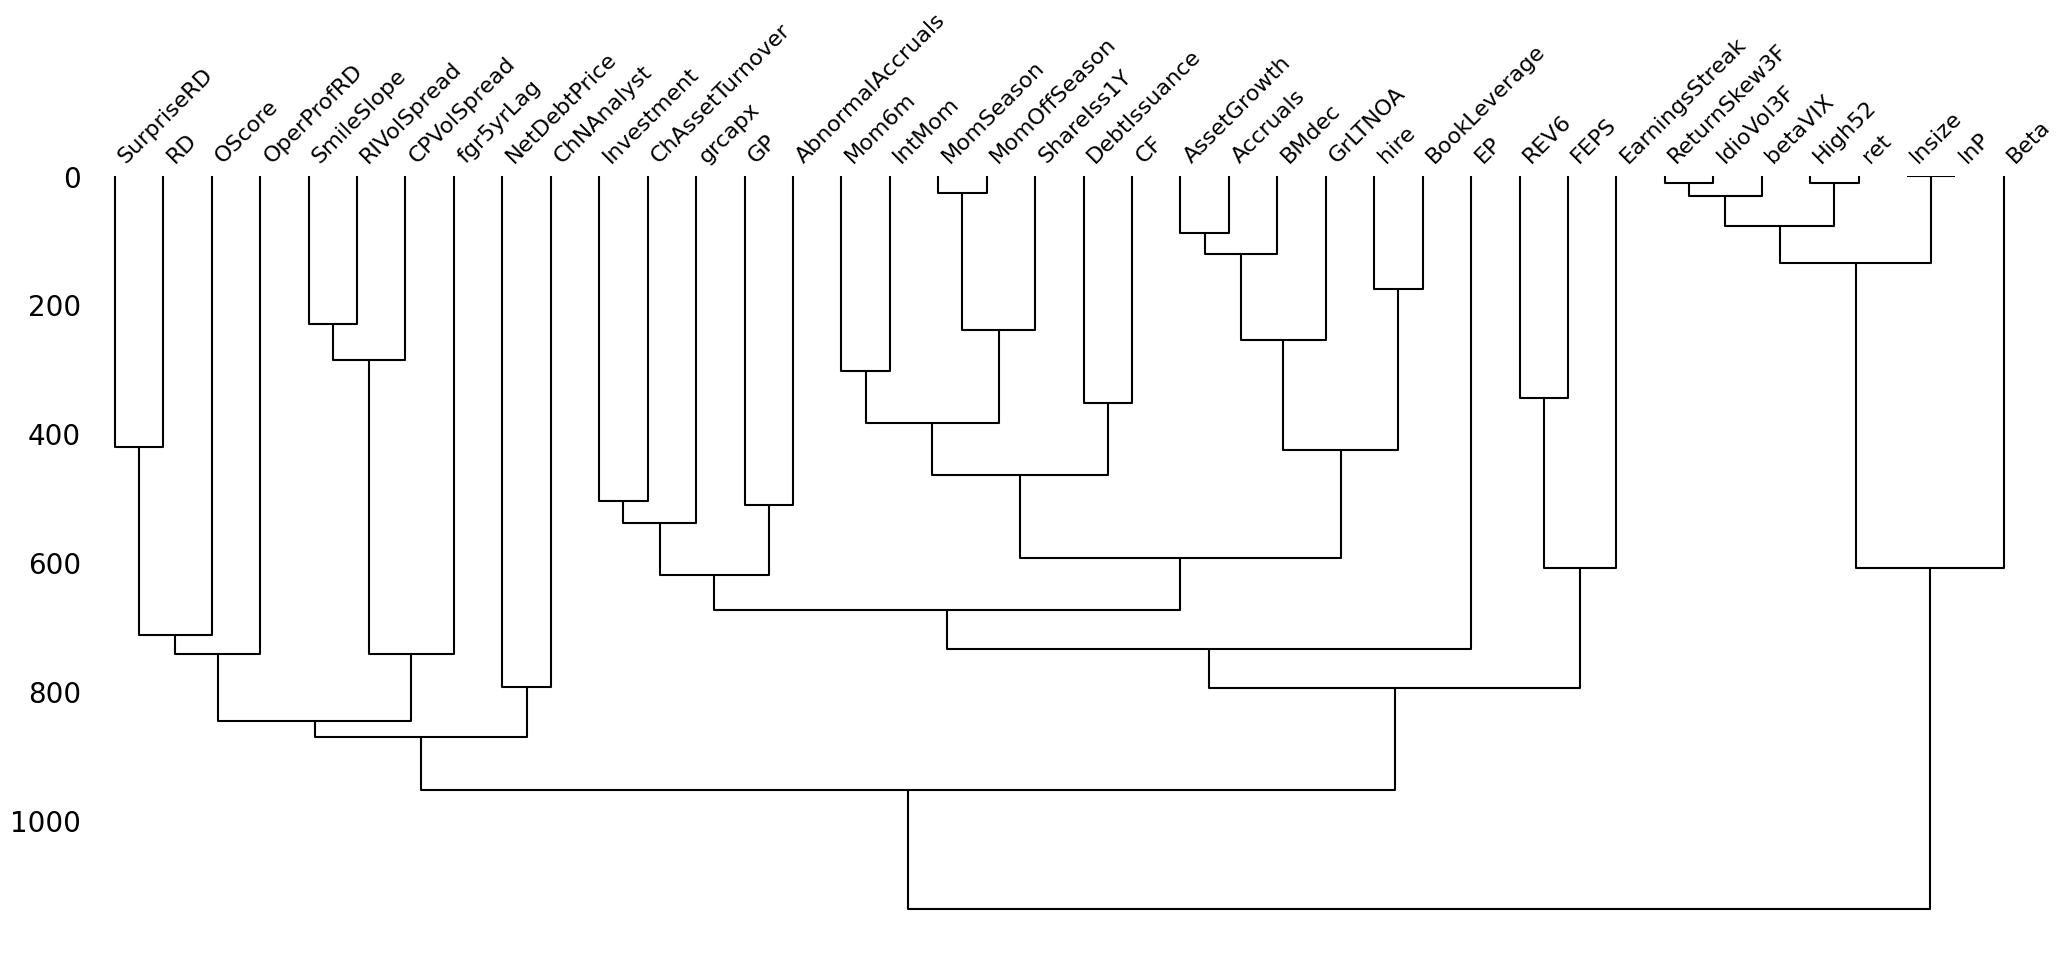

In [34]:
msno.dendrogram(sorted_cols)
plt.show()

In [ ]:
# prompt: Write a readme for this notebook

# Quantitative Investment Portfolio Analysis

This notebook explores a dataset of quantitative investment factors, focusing on the analysis of missing data and the selection of suitable factors for further analysis.

## Data Loading and Setup

The notebook starts by importing necessary libraries: pandas, numpy, matplotlib, seaborn, missingno, and Google Colab's drive integration.  It then mounts Google Drive and loads the factors data from a parquet file located in a specified directory.  The code identifies all factors in the dataset after the first three columns.

## Missing Data Analysis

The core of the notebook is dedicated to analyzing missing data within the selected factors.

- **Null Count Analysis:** Calculates the percentage of missing values for each factor.
- **Cumulative Histogram Visualization:** Generates a cumulative histogram to visualize the distribution of null counts. This plot shows the number of factors with a certain percentage or less of missing values. Horizontal lines show the number of variables that can be used while tolerating a certain percentage of missing values:
  - **Tolerate 0% missing data:** We can use 7 variables.
  - **Tolerate 25% missing data:** We can use 25 variables.
  - **Tolerate 35% missing data:** We can use 35 variables.

- **Missingno Visualizations:**  Uses the `missingno` library to generate several visualizations of the missing data patterns:
  - **Matrix:** Visualizes the nullity of the factors as a matrix.
  - **Filtered Matrix:** Two matrix visualizations - one of the bottom 18 factors, and one with the top 24 - provide a closer look at the most and least complete factors, sorted by ascending nullity.
  - **Dendrogram:** Illustrates the correlation of missing values between the different factors.


## Usage

1. **Setup:** Ensure you have the necessary libraries installed (`pandas`, `numpy`, `matplotlib`, `seaborn`, `missingno`). You may need to run `!pip install missingno` in a code cell.

2. **Data Location:**  Update the `data_dir` variable to point to the correct location of your `factors.parquet` file in your Google Drive.

3. **Run the Notebook:** Execute the cells sequentially. The visualizations and analysis will provide insights into the missing data pattern in your dataset, helping inform decisions about data cleaning and feature selection.